In [1]:
# Created by: Prof. Valdecy Pereira, D.Sc.
# UFF - Universidade Federal Fluminense (Brazil)
# email:  valdecy.pereira@gmail.com
from pyDecision.algorithm import promethee_ii
import numpy as np

import pandas as pd

In [2]:
# Load the data
data = pd.read_excel('skincaredata.xlsx')
data

,ProductID,Merk,Gambar,Harga Asli,Jenis Kulit Asli,Harga,Kualitas Bahan Produk,Jenis Kulit,Rating,Kesesuaian dengan Kulit Pengguna
0,1,Wardah Seaweed Balancing Facial Wash,https://d2jlkn4m127vak.cloudfront.net/medias/p...,20000,Kombinasi,5,4,5,3,2
1,2,clean&clear foaming face wash,https://www.cleanandclear.co.id/sites/cleanand...,20000,Berminyak,5,3,4,5,5
2,3,POISE anti acne,https://www.poise.co.id/storage/app/media/prod...,25000,Sesnsitif,5,3,2,5,5
3,4,Glad2Glow Blueberry Ceramide Low pH Gel Cleanser,"https://www.sociolla.com/cdn-cgi/image/w=325,f...",32000,Kombinasi,4,1,5,4,3
4,5,KAHF FACEWASH,https://www.kahfeveryday.com/wp-content/upload...,32000,Berminyak,4,4,4,4,3
5,6,Wardah Bright Oil Control,https://d2jlkn4m127vak.cloudfront.net/medias/p...,30000,Kering,4,3,3,5,5
6,7,Wardah Crystal Secret Foaming Cleanser,https://d2jlkn4m127vak.cloudfront.net/medias/p...,35500,Kombinasi,3,2,5,5,4
7,8,Hy! Amino AC-Ttack Anti-Acne Facial Wash,https://api.watsons.co.id/medias/zoom-front-37...,33000,Kombinasi,3,5,5,4,3
8,9,hadalabo fash wash,"https://www.soco.id/cdn-cgi/image/w=360,format...",35000,Kering,3,3,3,4,3
9,10,Whitelab acne care facial wash,"https://www.sociolla.com/cdn-cgi/image/w=325,f...",46000,Kombinasi,2,4,5,5,4


In [3]:
# Function to modify price values based on user input
def adjust_price_values(df, price_preference):
    data = df.copy()

    if price_preference.lower() == 'expensive':
        data['Harga'] = data['Harga'].apply(lambda x: 6 - x)
    return data

In [4]:
# Function to modify skin type values based on user input
def adjust_skin_type_values(df, skin_type_preference):
    data = df.copy()
    if skin_type_preference.lower() == 'sensitif':
        data['Jenis Kulit'] = data['Jenis Kulit'].apply(lambda x: 7 - x if x == 2 or x == 5 else x)
    elif skin_type_preference.lower() == 'berminyak':
        data['Jenis Kulit'] = data['Jenis Kulit'].apply(lambda x: 9 - x if x == 4 or x == 5 else x)
    elif skin_type_preference.lower() == 'kering':
        data['Jenis Kulit'] = data['Jenis Kulit'].apply(lambda x: 8 - x if x == 3 or x == 5 else x)
    return data

In [5]:
# Example user input for price preference
price_preference = 'cheap'  # or 'cheap'

# Adjust the price values based on user input
filter_1 = data.copy()
filter_1 = adjust_price_values(data, price_preference)
filter_1

,ProductID,Merk,Gambar,Harga Asli,Jenis Kulit Asli,Harga,Kualitas Bahan Produk,Jenis Kulit,Rating,Kesesuaian dengan Kulit Pengguna
0,1,Wardah Seaweed Balancing Facial Wash,https://d2jlkn4m127vak.cloudfront.net/medias/p...,20000,Kombinasi,5,4,5,3,2
1,2,clean&clear foaming face wash,https://www.cleanandclear.co.id/sites/cleanand...,20000,Berminyak,5,3,4,5,5
2,3,POISE anti acne,https://www.poise.co.id/storage/app/media/prod...,25000,Sesnsitif,5,3,2,5,5
3,4,Glad2Glow Blueberry Ceramide Low pH Gel Cleanser,"https://www.sociolla.com/cdn-cgi/image/w=325,f...",32000,Kombinasi,4,1,5,4,3
4,5,KAHF FACEWASH,https://www.kahfeveryday.com/wp-content/upload...,32000,Berminyak,4,4,4,4,3
5,6,Wardah Bright Oil Control,https://d2jlkn4m127vak.cloudfront.net/medias/p...,30000,Kering,4,3,3,5,5
6,7,Wardah Crystal Secret Foaming Cleanser,https://d2jlkn4m127vak.cloudfront.net/medias/p...,35500,Kombinasi,3,2,5,5,4
7,8,Hy! Amino AC-Ttack Anti-Acne Facial Wash,https://api.watsons.co.id/medias/zoom-front-37...,33000,Kombinasi,3,5,5,4,3
8,9,hadalabo fash wash,"https://www.soco.id/cdn-cgi/image/w=360,format...",35000,Kering,3,3,3,4,3
9,10,Whitelab acne care facial wash,"https://www.sociolla.com/cdn-cgi/image/w=325,f...",46000,Kombinasi,2,4,5,5,4


In [6]:
skin_type_preference = 'kombinasi'

# Adjust the skin type values based on user input
filter_2 = filter_1.copy()
filter_2 = adjust_skin_type_values(filter_1, skin_type_preference)
filter_2

,ProductID,Merk,Gambar,Harga Asli,Jenis Kulit Asli,Harga,Kualitas Bahan Produk,Jenis Kulit,Rating,Kesesuaian dengan Kulit Pengguna
0,1,Wardah Seaweed Balancing Facial Wash,https://d2jlkn4m127vak.cloudfront.net/medias/p...,20000,Kombinasi,5,4,5,3,2
1,2,clean&clear foaming face wash,https://www.cleanandclear.co.id/sites/cleanand...,20000,Berminyak,5,3,4,5,5
2,3,POISE anti acne,https://www.poise.co.id/storage/app/media/prod...,25000,Sesnsitif,5,3,2,5,5
3,4,Glad2Glow Blueberry Ceramide Low pH Gel Cleanser,"https://www.sociolla.com/cdn-cgi/image/w=325,f...",32000,Kombinasi,4,1,5,4,3
4,5,KAHF FACEWASH,https://www.kahfeveryday.com/wp-content/upload...,32000,Berminyak,4,4,4,4,3
5,6,Wardah Bright Oil Control,https://d2jlkn4m127vak.cloudfront.net/medias/p...,30000,Kering,4,3,3,5,5
6,7,Wardah Crystal Secret Foaming Cleanser,https://d2jlkn4m127vak.cloudfront.net/medias/p...,35500,Kombinasi,3,2,5,5,4
7,8,Hy! Amino AC-Ttack Anti-Acne Facial Wash,https://api.watsons.co.id/medias/zoom-front-37...,33000,Kombinasi,3,5,5,4,3
8,9,hadalabo fash wash,"https://www.soco.id/cdn-cgi/image/w=360,format...",35000,Kering,3,3,3,4,3
9,10,Whitelab acne care facial wash,"https://www.sociolla.com/cdn-cgi/image/w=325,f...",46000,Kombinasi,2,4,5,5,4


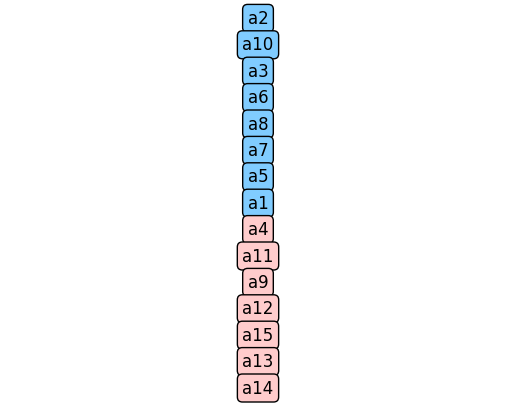

[[ 2.          0.41428571]
 [10.          0.37142857]
 [ 3.          0.28571429]
 [ 6.          0.27142857]
 [ 8.          0.25714286]
 [ 7.          0.21428571]
 [ 5.          0.11428571]
 [ 1.          0.08571429]
 [ 4.         -0.04285714]
 [11.         -0.18571429]
 [ 9.         -0.18571429]
 [12.         -0.21428571]
 [15.         -0.32857143]
 [13.         -0.42857143]
 [14.         -0.62857143]]
Rank 1: clean&clear foaming face wash (20000)
Rank 2: Whitelab acne care facial wash (46000)
Rank 3: POISE anti acne (25000)


In [9]:
# Function to perform PROMETHEE II analysis and return top 3 products
def get_top_3_products(price_preference: str, skin_type_preference: str):
    df = data.copy()
    df = adjust_price_values(df, price_preference)
    df = adjust_skin_type_values(df, skin_type_preference)
    
    decision_matrix = df.iloc[:, 5:].values
    criteria_weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
    Q = [0.1, 0.1, 0.1, 0.1, 0.1]
    S = [0.1, 0.1, 0.1, 0.1, 0.1]
    P = [0.2, 0.2, 0.2, 0.2, 0.2]
    F = ['t2', 't2', 't2', 't2', 't2']
    
    result = promethee_ii(decision_matrix, criteria_weights, Q, S, P, F, graph=True, verbose=True)
    print(result)
    ranking = result[:, 1]
    ranked_indices = result[:, 0].astype(int) - 1
    sorted_indices = np.argsort(ranking)[::-1]
    
    top_3 = []
    for rank, sorted_index in enumerate(sorted_indices[:3], start=1):
        original_index = ranked_indices[sorted_index]
        product = {
            "ProductID": int(df['ProductID'].iloc[original_index]),
            "ProductName": df['Merk'].iloc[original_index],
            "Image": df['Gambar'].iloc[original_index],
            "RealPrice": int(df['Harga Asli'].iloc[original_index]),
            "RealSkinType": df['Jenis Kulit Asli'].iloc[original_index],
            "Rating": int(df['Rating'].iloc[original_index])
        }
        print(f"Rank {rank}: {product['ProductName']} ({product['RealPrice']})")
        top_3.append(product)
    
    return top_3

# Get the top 3 products based on user input
top_3_products = get_top_3_products(price_preference, skin_type_preference)